[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mGXCNLa1hkdcmcMnQz3tg8mqb_NkFOFe?usp=sharing)

## (Extra) Numpy tricks

Problem: implement 2x2 rolling window for given 2d array 

In [3]:
import numpy as np

x = np.arange(100).reshape(10, 10)
x.shape, x.strides

((10, 10), (80, 8))

Solution:

In [4]:
a2 = np.lib.stride_tricks.as_strided(x, shape=(9, 9, 2, 2), strides=(40, 4, 40, 4))

In [5]:
print(a2[0, 0])
print(a2[1, 1])

[[          0  4294967296]
 [          5 25769803776]]
[[25769803776           6]
 [47244640256          11]]


Usage: average 2d matrix over 2x2 windows:  

In [6]:
a2.mean(axis=(-2, -1))

array([[7.51619277e+09, 7.51619277e+09, 9.66367642e+09, 9.66367642e+09,
        1.18111601e+10, 1.18111601e+10, 1.39586437e+10, 1.39586437e+10,
        1.61061274e+10],
       [1.82536110e+10, 1.82536110e+10, 2.04010947e+10, 2.04010947e+10,
        2.25485783e+10, 2.25485783e+10, 2.46960620e+10, 2.46960620e+10,
        2.68435456e+10],
       [2.89910293e+10, 2.89910293e+10, 3.11385129e+10, 3.11385129e+10,
        3.32859966e+10, 3.32859966e+10, 3.54334802e+10, 3.54334802e+10,
        3.75809638e+10],
       [3.97284475e+10, 3.97284475e+10, 4.18759311e+10, 4.18759311e+10,
        4.40234148e+10, 4.40234148e+10, 4.61708984e+10, 4.61708984e+10,
        4.83183821e+10],
       [5.04658657e+10, 5.04658657e+10, 5.26133494e+10, 5.26133494e+10,
        5.47608330e+10, 5.47608330e+10, 5.69083167e+10, 5.69083167e+10,
        5.90558003e+10],
       [6.12032840e+10, 6.12032840e+10, 6.33507676e+10, 6.33507676e+10,
        6.54982513e+10, 6.54982513e+10, 6.76457349e+10, 6.76457349e+10,
        6.9

# Matplotlib

In [7]:
import matplotlib.pyplot as plt

### Basic charts

![](https://qph.fs.quoracdn.net/main-qimg-e649ba1703fef26b52964b58c7f7f2b3)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

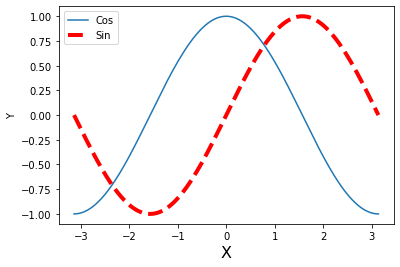

In [8]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)


plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

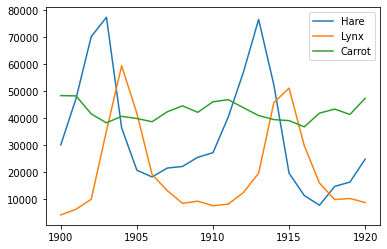

In [9]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:,0]
plt.plot(years, data[:,1], label = 'Hare')
plt.plot(years, data[:,2], label = 'Lynx')
plt.plot(years, data[:,3], label = 'Carrot')
plt.xticks(years.astype(int)[::5])
plt.legend()
plt.show()



Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

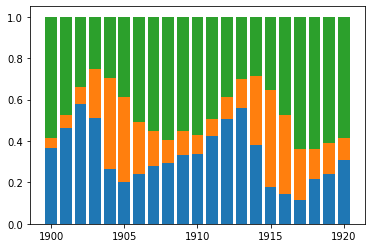

In [10]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:,0]
summa = data[:,1]+data[:,2]+data[:,3]
plt.bar(years,data[:,1]/summa)
plt.bar(years,data[:,2]/summa,bottom = data[:,1]/summa)
plt.bar(years,data[:,3]/summa,bottom = data[:,2]/summa+data[:,1]/summa)
plt.show()


Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

сделали в классе

Find which year each species had the largest population. Mark these years in the plot of populations.

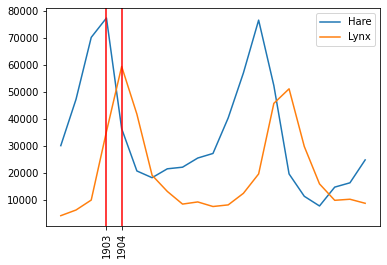

In [11]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:,0]
plt.plot(years, data[:,1], label = 'Hare')
plt.plot(years, data[:,2], label = 'Lynx')

plt.axvline(years[np.argmax(data[:,1])], c = 'r')
plt.axvline(years[np.argmax(data[:,2])], c = 'r')
#plt.xticks(years.astype(int)[::2])
plt.xticks([years[np.argmax(data[:,1])],years[np.argmax(data[:,2])]],rotation = 90)
plt.legend()
plt.show()


Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

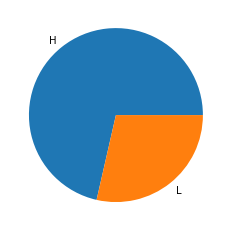

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


In [12]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:,0]
h = data[:,1]
l = data[:,2]
plt.pie([sum(h>=l),sum(l>h)] ,labels =['H','L'])
plt.show()
a= list()
for i in range(0,len(years)):
    if h[i]>=l[i]:
        a.append('H')
    else:
        a.append('L')
print(a)
  


 Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

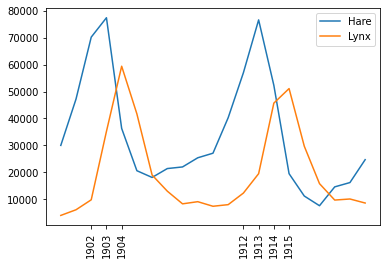

[ 34000.  53300.  80000. 112600.  95700.  62300.  37100.  34400.  30300.
  34500.  34500.  48300.  69300.  96100.  98000.  70600.  40900.  23400.
  24300.  26300.  33300.]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:,0]
plt.plot(years, data[:,1], label = 'Hare')
plt.plot(years, data[:,2], label = 'Lynx')

a = np.maximum(data[:,1],data[:,2])
plt.xticks(years[a>50000],rotation = 90)
plt.legend()
plt.show()
print(data[:,1]+data[:,2])

Find the top 2 years for each species when they had the lowest populations.

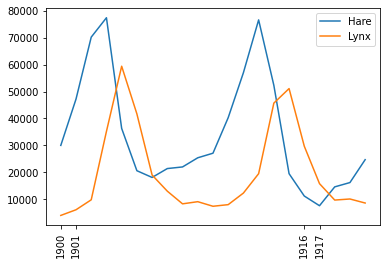

In [14]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
hare = data[:,1]
lynx = data[:,2]
year = data[:,0]

hareyear1 = np.argmin(hare)
hareyear2 = np.argmin(np.insert(np.delete(hare,hareyear1), hareyear1,1000000))
lynxyear1 = np.argmin(lynx)
lynxyear2 = np.argmin(np.insert(np.delete(lynx,lynxyear1), lynxyear1,1000000))

plt.plot(years, data[:,1], label = 'Hare')
plt.plot(years, data[:,2], label = 'Lynx')
plt.xticks([year[lynxyear1],year[lynxyear2],year[hareyear1],year[hareyear2]],rotation = 90)
plt.legend()
plt.show()


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

сделали в классе

Show population of hares vs carrots and hares vs lynxes.

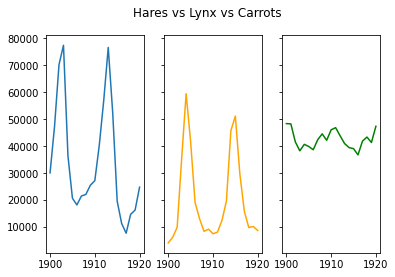

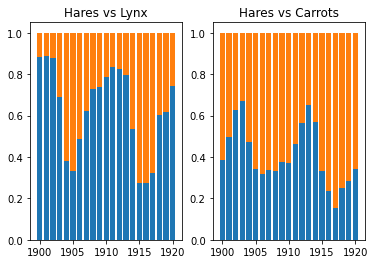

In [35]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
year = data[:,0]
fig,ax = plt.subplots(1,3, sharey = True)
ax[0].plot(years, data[:,1], label = 'Hare')
ax[1].plot(years, data[:,2], label = 'Lynx', c = 'orange')
ax[2].plot(years, data[:,3], label = 'Carrots', c ='green')
fig.suptitle('Hares vs Lynx vs Carrots')
plt.show()

#second version of comparison
fig,ax = plt.subplots(1,2)
summa = data[:,1]+data[:,2]
ax[0].bar(years,data[:,1]/summa)
ax[0].bar(years,data[:,2]/summa,bottom = data[:,1]/summa)
ax[0].set_title('Hares vs Lynx')
summa = data[:,1]+data[:,3]
ax[1].bar(years,data[:,1]/summa)
ax[1].bar(years,data[:,3]/summa,bottom = data[:,1]/summa)
ax[1].set_title('Hares vs Carrots')
plt.show()




Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

This data for hares looks approximately 10-years periodical, so I would suggest to estimate 1920 value with 1910 value. I will also compare it with the median

In [16]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
year = data[:,0] 
hare = data[:,1]
print('Predicted 1920 value is', hare[10])
print('Real 1920 value is', hare[20])
print('Median is',np.median(hare))
print('The error according to the periodicy is',abs((hare[20]-hare[10])/hare[20]))
print('The error for median is', abs((hare[20]-np.median(hare))/hare[20]))

Predicted 1920 value is 27100.0
Real 1920 value is 24700.0
Median is 25400.0
The error according to the periodicy is 0.09716599190283401
The error for median is 0.02834008097165992


## High-dimentional data visualization

What is an image?

![img](https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg)

Basically, it is an array of numbers:

In [17]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
print(np.array(img).shape)
np.array(img)

(500, 750)


array([[145, 145, 144, ..., 142, 143, 144],
       [146, 146, 146, ..., 141, 143, 144],
       [146, 147, 146, ..., 140, 142, 143],
       ...,
       [114, 111, 120, ...,  78,  69,  56],
       [ 75,  83, 104, ...,  53,  51,  64],
       [ 63,  82, 108, ..., 101,  95,  94]], dtype=uint8)

What if we take a random point in a 500*750 dimentional space? Will it be a meaningful image?

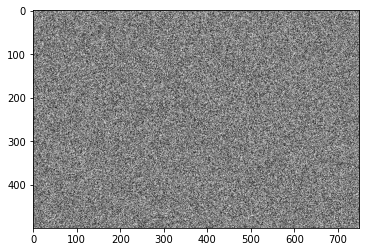

In [18]:
sample_img = np.random.choice(np.arange(256), size=500*750).reshape(500, 750)
plt.imshow(sample_img, cmap='gray')
plt.show()

Meaningful images are very rare subset (manifold?) in a space of all possible images. Can we explore a structure of this subset?

Get the MNIST dataset:

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
images = digits.data.reshape(-1, 8, 8)

Look at some items in the dataset:

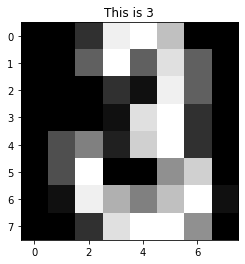

In [21]:
i = 985
plt.imshow(images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

Let's find a good projection plane for our data:

![img](https://i.stack.imgur.com/G7Gkv.png)

What is good actually?

![img](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

For detailed derivation of PCA look https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture7.pdf

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_transformed.shape

(1797, 10)

Variances along eigenvectors:

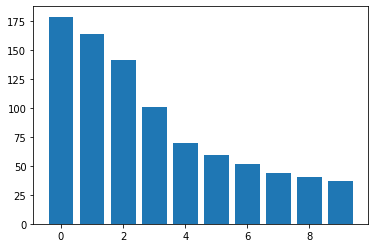

In [23]:
plt.bar(np.arange(10), pca.explained_variance_)
plt.show()

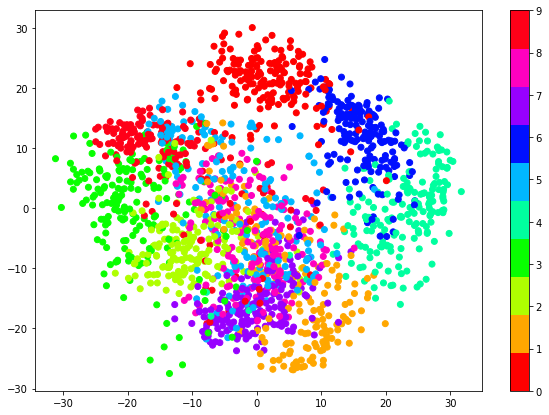

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

Make the projection manually. What we need are basis vectors and mean shift:

In [25]:
pca.components_.shape, pca.mean_.shape

((10, 64), (64,))

Project on a subspace of principal components:

In [26]:
proj = np.dot(digits.data.astype(float) - pca.mean_, pca.components_.T)
proj.shape

(1797, 10)

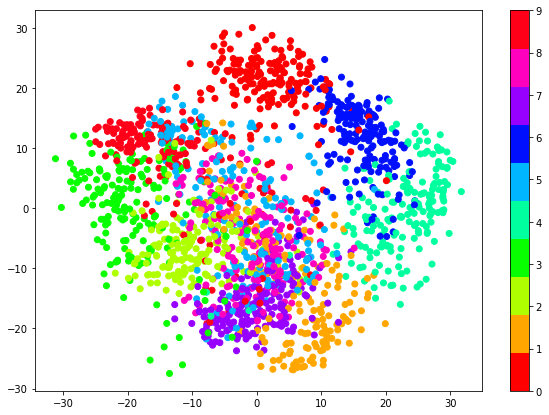

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

We can plot in 3D:

<IPython.core.display.Javascript object>


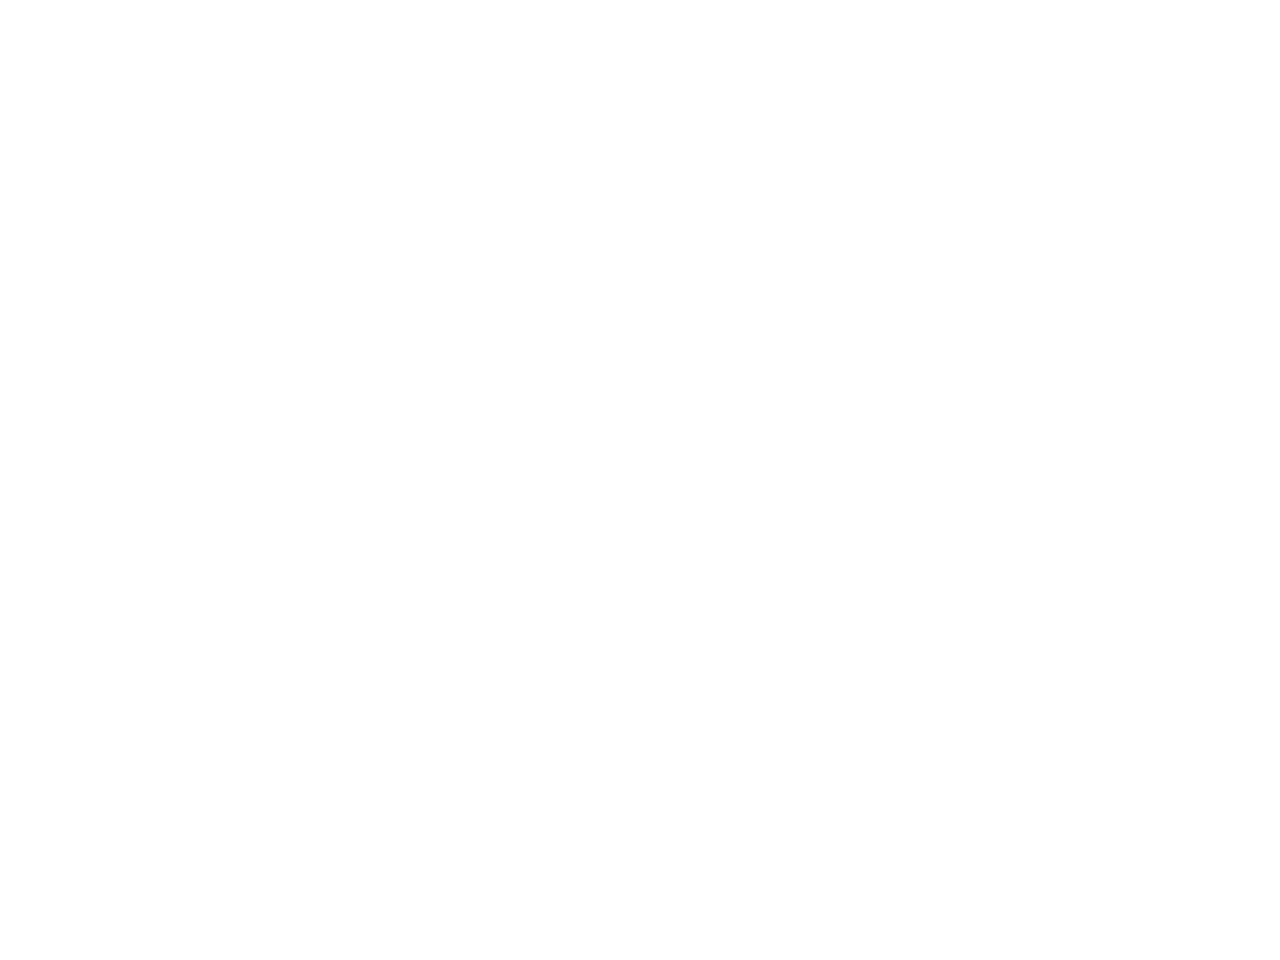

In [28]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X_transformed.T[:3], c=digits.target, cmap='hsv')
plt.show()

To what extent we can restore original data from principal components?

In [29]:
X_restored = pca.inverse_transform(X_transformed)
X_restored.shape

(1797, 64)

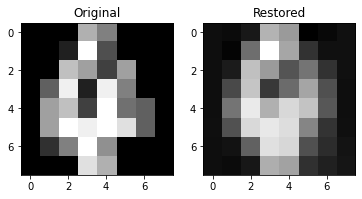

In [30]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Can you perform inverse transoformation explicitly?

res = np.dot(X_transformed, ???) + ???

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(res[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Homework:

1. Complete all exersices with Lynx-Rabbits dataset.
2. Plot a graph of total explained variance vs number of principal components.
3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.
4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.
    
    Hint: download full-size 28x28 MNIST images to better see a difference between original and restored images

```python
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
```

![img](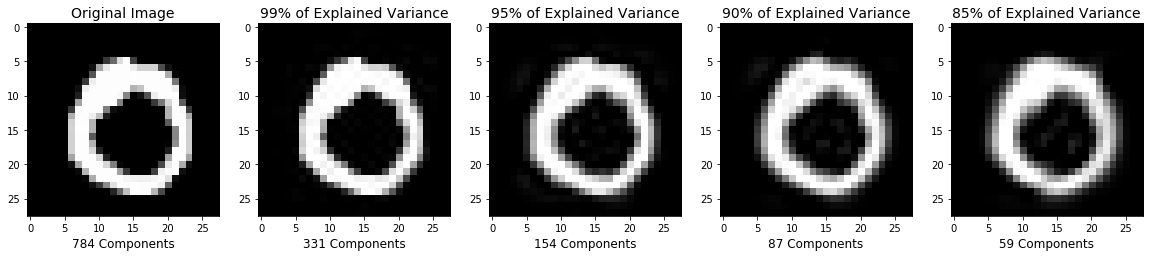%0A)

5*. Can you get a more insightful representation of MNIST dataset in 2D? For inspiration see https://colah.github.io/posts/2014-10-Visualizing-MNIST/

Plot a graph of total explained variance vs number of principal components.

In [36]:
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA 
from sklearn.datasets import fetch_openml 
digits = fetch_openml('mnist_784')


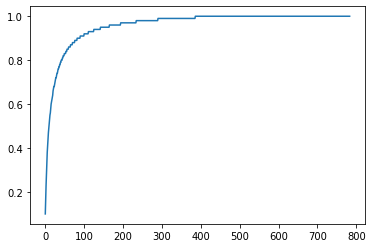

In [37]:
pca = PCA() 
X_transformed = pca.fit_transform(digits.data.astype(float)) 
explained_variance = pca.explained_variance_ratio_.cumsum().round(2) 
plt.plot(explained_variance) 
plt.show()

Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [38]:
me = np.where(explained_variance == 0.99)
var99 = int(round(np.mean(me)))
print(var99, "principal components for 99% of explained variance")
me = np.where(explained_variance == 0.95)
var95 = int(round(np.mean(me)))
print(var95, "principal components for 95% of explained variance")
me = np.where(explained_variance == 0.90)
var90 = int(round(np.mean(me)))
print(var90, "principal components for 90% of explained variance")
me = np.where(explained_variance == 0.85)
var85 = int(round(np.mean(me)))
print(var85, "principal components for 85% of explained variance")

338 principal components for 99% of explained variance
153 principal components for 95% of explained variance
86 principal components for 90% of explained variance
58 principal components for 85% of explained variance


Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

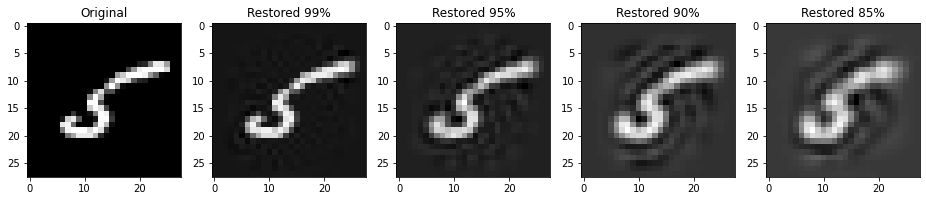

In [39]:
pca99 = PCA(var99)
trans99 = pca99.fit_transform(digits.data.astype(float))
restored99 = pca99.inverse_transform(trans99)
pca95 = PCA(var95)
trans95 = pca95.fit_transform(digits.data.astype(float))
restored95 = pca95.inverse_transform(trans95)
pca90 = PCA(var90)
trans90 = pca90.fit_transform(digits.data.astype(float))
restored90 = pca90.inverse_transform(trans90)
pca85 = PCA(var85)
trans85 = pca85.fit_transform(digits.data.astype(float))
restored85 = pca85.inverse_transform(trans85)
images = digits.data.reshape(-1, 28, 28)
i = 11
fig, ax = plt.subplots(1, 5, figsize=(16, 7))
ax[0].imshow(images[i], cmap="gray")
ax[1].imshow(restored99[i].reshape(28, 28), cmap="gray")
ax[2].imshow(restored95[i].reshape(28, 28), cmap="gray")
ax[3].imshow(restored90[i].reshape(28, 28), cmap="gray")
ax[4].imshow(restored85[i].reshape(28, 28), cmap="gray")
ax[0].set_title("Original")
ax[1].set_title("Restored 99%")
ax[2].set_title("Restored 95%")
ax[3].set_title("Restored 90%")
ax[4].set_title("Restored 85%")
plt.show()